In [49]:
import xarray as xr
import matplotlib.pylab as plt
import xesmf as xe
import geopandas 
import rioxarray

In [50]:
in_dir = "/data/ABOVE/MODIS/LAI_CLM_DOMAIN/"
out_dir = ("/data/ABOVE/MODIS/LAI_CLM_DOMAIN/processed/")

In [41]:
clm_image = xr.open_dataset(in_dir+"freeCLM5.1forILAMB.nc")
clm_image = clm_image["TLAI"].isel(time=1)


In [43]:
lst_changed = xr.open_dataarray("/data/home/hamiddashti/nasa_above/outputs/Natural_Variability/Natural_Variability_Annual_outputs/geographic/02_percent/dlst_mean_changed.nc", decode_coords="all")
lst_not_changed = xr.open_dataarray("/data/home/hamiddashti/nasa_above/outputs/Natural_Variability/Natural_Variability_Annual_outputs/geographic/02_percent/dlst_mean_not_changed.nc", decode_coords="all")
lst_lcc = xr.open_dataarray("/data/home/hamiddashti/nasa_above/outputs/Natural_Variability/Natural_Variability_Annual_outputs/geographic/02_percent/dlst_mean_lcc.nc", decode_coords="all")
lst_nv = xr.open_dataarray("/data/home/hamiddashti/nasa_above/outputs/Natural_Variability/Natural_Variability_Annual_outputs/geographic/02_percent/dlst_mean_nv.nc", decode_coords="all")


In [44]:
ds_out = xr.Dataset({
    'lat': (['lat'], clm_image['lat'].values),
    'lon': (['lon'], clm_image['lon'].values)
})
ds_in = xr.Dataset({
    'lat': (['lat'], lst_changed['lat'].values),
    'lon': (['lon'], lst_changed['lon'].values)
})

In [45]:
regridder = xe.Regridder(ds_in, ds_out, 'bilinear')
# regridder.to_netcdf(out_dir+"regridder_albedo_entire_clm_domain.nc")

In [46]:
lst_changed_regrided = regridder(lst_changed)
lst_not_changed_regrided = regridder(lst_not_changed)
lst_lcc_regrided = regridder(lst_lcc)
lst_nv_regrided = regridder(lst_nv)

/data/home/hamiddashti/miniconda3/envs/conda_env/lib/python3.8/site-packages/xesmf/frontend.py:466: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


In [47]:
lst_changed_regrided = lst_changed_regrided.rio.write_crs(4326)
lst_changed_regrided = lst_changed_regrided.rename({"lon":"x","lat":"y"})
geodf = geopandas.read_file("/data/ABOVE/Final_data/shp_files/CoreDomain_geographic.shp")
lst_changed_regrided_clipped = lst_changed_regrided.rio.clip(geodf.geometry.values, geodf.crs)

lst_not_changed_regrided = lst_not_changed_regrided.rio.write_crs(4326)
lst_not_changed_regrided = lst_not_changed_regrided.rename({"lon":"x","lat":"y"})
lst_not_changed_regrided_clipped = lst_not_changed_regrided.rio.clip(geodf.geometry.values, geodf.crs)

lst_lcc_regrided = lst_lcc_regrided.rio.write_crs(4326)
lst_lcc_regrided = lst_lcc_regrided.rename({"lon":"x","lat":"y"})
lst_lcc_regrided_clipped = lst_lcc_regrided.rio.clip(geodf.geometry.values, geodf.crs)

lst_nv_regrided = lst_nv_regrided.rio.write_crs(4326)
lst_nv_regrided = lst_nv_regrided.rename({"lon":"x","lat":"y"})
lst_nv_regrided_clipped = lst_nv_regrided.rio.clip(geodf.geometry.values, geodf.crs)

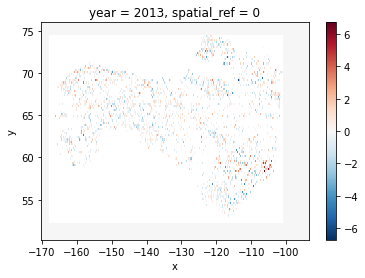

In [51]:
lst_lcc_regrided